<a href="https://colab.research.google.com/github/Marianderita/ML_Practice/blob/main/HW9_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому домашньому завданні ми будемо працювати з набором даних Tips. Нижче інформація про нього.

**Про датасет:**

Tips - це датасет, який містить інформацію про рахунки та чайові в ресторані.

**Колонки датасету:**
- `total_bill` - загальна сума рахунку (долари)
- `tip` - розмір чайових (долари)
- `sex` - стать відвідувача (Male/Female)
- `smoker` - чи курить (Yes/No)
- `day` - день тижня (Thur/Fri/Sat/Sun)
- `time` - час відвідування (Lunch/Dinner)
- `size` - розмір групи (кількість людей)

**Джерело:** Оригінальні дані зібрані в одному з американських ресторанів у 1990-х роках. Скачати і переглянути набір даних можна тут: https://www.kaggle.com/datasets/sakshisatre/tips-dataset

А також ми вже вивантажили файл з даними і завантажили вам у Матеріали до цього модуля.




**1. Гістограма розподілу рахунків**
Завантажте датасет Tips (Чайові) з файла у матеріалах `tips.csv`.
Створіть гістограму для колонки `total_bill` з 20 bins.
Опціонально можна додати підписи осей ОХ, ОУ, а також назву графіку.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd

data_path = '/content/drive/MyDrive/Python/ML/Data/tips.csv'
df = pd.read_csv(data_path)

In [7]:
import matplotlib.pyplot as plt

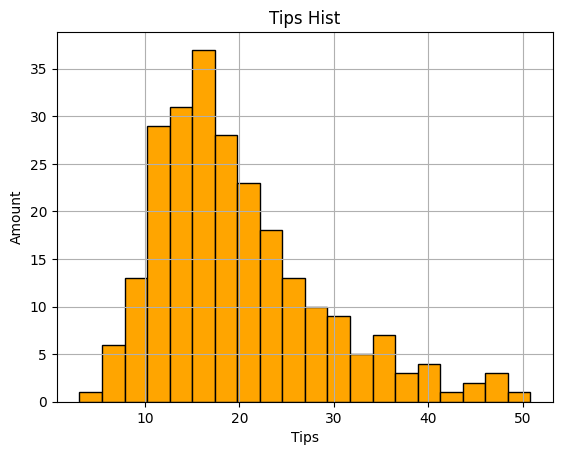

In [17]:
df.total_bill.hist(bins = 20, color = 'orange', edgecolor = 'black')
plt.title('Tips Hist')
plt.xlabel('Tips')
plt.ylabel('Amount');

---

**2. Box plot чайових за днями тижня**

Створіть box plot, який показує розподіл чайових (`tip`) за днями тижня (`day`).
В який день навище медіанне (середнє) значення чайоивх? Зелена горизонтальна лінія всередині кожного box-plot.


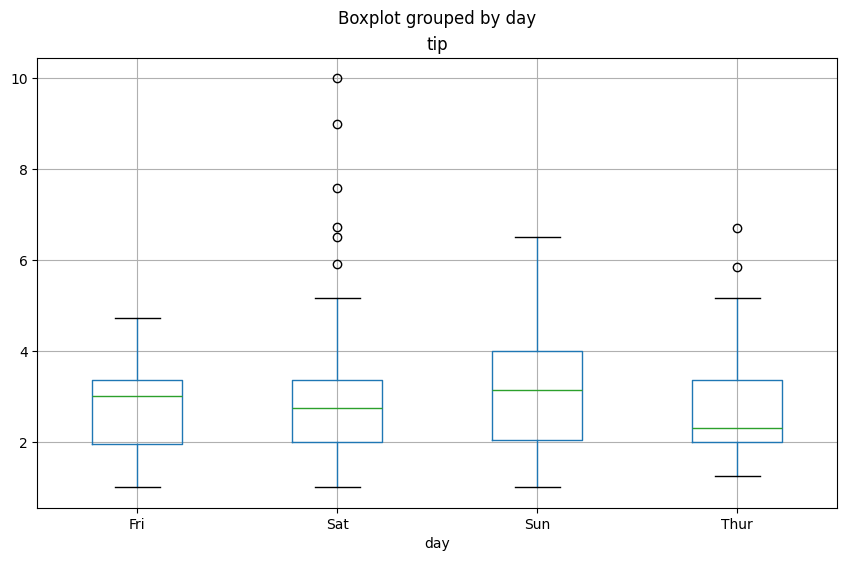

In [20]:
df.boxplot(column = 'tip', by = 'day', figsize=(10,6));

Найвище медіанне (середнє) значення чайових у нелілю, і трошки програє неділі п'ятниця.

In [27]:
print('Перевіримо:\n')

print(f'У пт: {df[df.day == 'Fri']['tip'].mean().round(2)}')
print(f'У нд: {df[df.day == 'Sun']['tip'].mean().round(2)}')

print('\nЯк бачимо, у нд дійсно більше')

Перевіримо:

У пт: 2.73
У нд: 3.26

Як бачимо, у нд дійсно більше


---

**3. Scatter plot: рахунок vs чайові**

Створіть діаграму розсіювання для `total_bill` та `tip`.

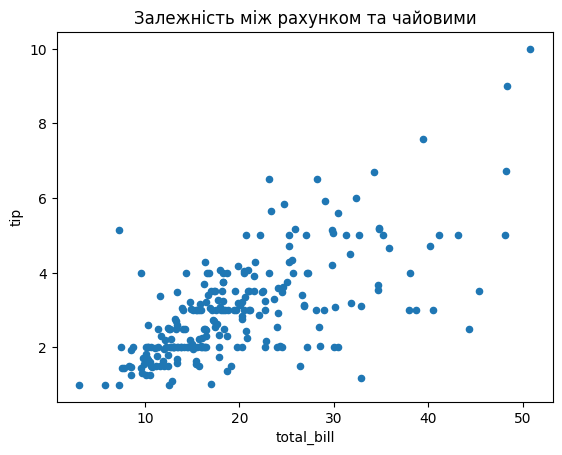

In [31]:
df.plot(
    kind = 'scatter',
    x = 'total_bill',
    y = 'tip'
    )
plt.title('Залежність між рахунком та чайовими');

---

**4. Bar chart: середній рахунок за часом**

Створіть стовпчасту діаграму середнього рахунку за часом дня (`time`).

In [36]:
df_bar_chart = df.groupby('time')['total_bill'].mean()

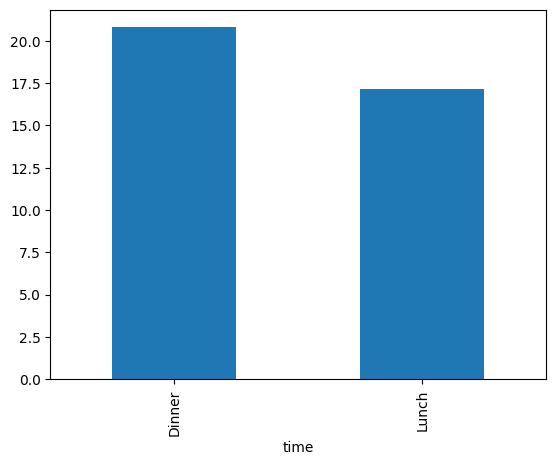

In [38]:
df_bar_chart.plot(
    kind = 'bar',
    x = 'time'
);

---

**5. Інтерактивна діаграма розсіювання**

Створіть з допомогою бібліотек Plotly інтерактивний scatter plot для `total_bill` vs `tip` з кольором за статтю (`sex`).


In [39]:
import plotly.express as px
import plotly.graph_objects as go

In [46]:
px.scatter(df,
           x = 'total_bill',
           y = 'tip',
           color = 'sex',
           size = 'size'
           )

---

**6. Інтерактивний box plot: чайові за днями та статтю**

Створіть інтерактивний box plot для чайових за днями тижня з розбивкою за кольором по статі.

In [52]:
px.box(df,
       x = 'day',
       y = 'tip',
       color ='sex'
       )